## 第二章
* 第二章主要围绕一些简单的pytorch使用和基础数学知识展开，是后续学习的基础

### 2.1 数据操作

In [2]:
# 一些最为基础的pytorch数值计算函数示意
import torch

x = torch.arange(12)
print(x)
# torch.arange创建一个行向量，行向量在未指定开始整数时默认为0，共计12个元素，即0-11

print(x.shape)
# 通过访问pytorch中基础运算单元tensor的属性shape可以得到当前tensor的数值形状

print(x.numel())
# numel()方法可以得到当前tensor的所有内部元素个数

x = x.reshape((3,4))
print(x)
# reshape方法重新创建一个符合定义形状的tensor，因此如果希望更改当前tensor，需要重新赋值一次

print(torch.zeros(2,3,4)) #torch.zeros((2,3,4))
# zeros或ones定义一个全是0或者全是1的tensor，形状符合定义

print(torch.randn((2,3))) 
# randn定义一个符合规定形状的遵从标准正态分布的tensor数组

a = [[1,2,3],[3,4,5]]
print(torch.tensor(a))
# torch.tensor将一个ndarray、普通列表等不是tensor的运算单元转换为torch里面的tensor数组

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[ 0.8435, -0.4141, -1.5065],
        [ 0.3616, -0.7020, -1.5590]])
tensor([[1, 2, 3],
        [3, 4, 5]])


In [ ]:
# 既然torch.tensor创建的都是一些计算单元，tensor可以参与各种各样的运算，因此这部分介绍了一些基本的数学运算

x = torch.ones(4) * 2
y = torch.tensor([1.0, 2, 4, 8])
print(x + y, x - y, x * y, x / y, x ** y)
# 上述加减乘除求幂运算均基于相同元素位置操作的计算原则

print(torch.exp(x))
print(torch.log(x))
# 可以按照元素位置操作的原则定义一些其他的计算

print(x.sum())
print(torch.abs(x).sum())
# 按元素计算的方式可以遍历整个tensor，通过sum()方法计算tensor的所有元素之和，那当然也可以用这样的方式计算L1范数

X = torch.arange(12, dtype=torch.float32).reshape((3,4))  
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(torch.cat((X,Y),dim = 0),torch.cat((X,Y),dim = 1))
# torch.cat的这个方法和之前的一些定义tensor的方法不同，在定义tensor的方法中，指代形状的多维维数可以组合成一个list或tuple，但也可以分开，但在torch.cat中一定需要组合在一起，可以"转到定义"查看具体的使用方法

X == Y
# 有数值计算，tensor自然也支持逻辑运算

tensor([ 3.,  4.,  6., 10.]) tensor([ 1.,  0., -2., -6.]) tensor([ 2.,  4.,  8., 16.]) tensor([2.0000, 1.0000, 0.5000, 0.2500]) tensor([  2.,   4.,  16., 256.])
tensor([7.3891, 7.3891, 7.3891, 7.3891])
tensor([0.6931, 0.6931, 0.6931, 0.6931])
tensor(8.)
tensor(8.)
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]) tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


In [ ]:
# 脱胎于numpy.ndarray，pytorch中的tensor计算单元同样有特殊的广播机制，这个机制能帮助我们在代码中简化很多操作，但有时不注意也会造成一些不必要的问题

a = torch.arange(3).reshape((3, 1))  
b = torch.arange(2).reshape((1, 2))
print(a)
print(a.shape)
print(b)
print(b.shape)
# 两个tensor的形状不相同，但我们仍然可以让这两个tensor参与前面一样的按元素运算

print(a + b)
# 两个tensor在形状不同的情况下，使用按元素计算会自动的在不足的那个维度上复制自动填充，达到相同形状按元素运算的效果


In [ ]:
# 类似其他python数组，tensor也可以有索引切片等基本操作

X = torch.arange(12, dtype=torch.float32).reshape((3,4)) 
print(X[-1])
print(X[1:3])
# 这里的切片只指定了一个维度，那么就只关心第一个维度的指定切片，其他的所有维度全额保留


X[1, 2] = 9
print(X)
# 通过索引改写tensor当中的单个元素

X[0:2, :] = 12
print(X)
# 上述的改写方式等同于X[0:2] = 12



tensor([ 8.,  9., 10., 11.])
tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])


In [11]:
# 这一部分是一个实用的知识点介绍，根据tensor对象的创建原理，可以通过分析tensor的存储地址来得到更为高效的tensor创建改写方式，目的是为了节省内存

before = id(Y)
Y = Y + X
print(before == id(Y))
# 输出False,原因是 Y = Y + X 会重新创建一个Y，这个Y不再是原来的Y，相当于并未在去掉原来Y的基础上重新存储了一个变量，这在内存中就造成了不必要的存储，下面推荐两种不同的原地操作方式，都能保证在原来的tensor上进行操作

Z = torch.arange(12).reshape(3,4)
before_z = id(Z)
Z[:] = Z + Y
print(id(Z) == before_z)
# 这里相当于通过索引的方式只是改写了每个元素的值

M = torch.arange(12,dtype = torch.float).reshape(3,4)
before_m = id(M)
M += Y
print(id(M) == before_m)




False
True
True


In [ ]:
# pytorch中的tensor对象作为专属的计算单元，也可以与python中的其他基础数据结构进行转换，最为常规的就是和numpy.ndarray的相互转换和普通的float int list等

a = torch.tensor([1,2,3])
print(type(a))

b = a.numpy()
print(type(b))

c = a.sum()
print(c, type(c))
print(c.item(), float(c), int(c))
# 将单个元素的tensor变成普通的标量通常使用item()

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
tensor(6) <class 'torch.Tensor'>
6 6.0 6


### 2.2 数据预处理

In [6]:
# 现实场景中数据多数时候都不是由使用者去定义的，数据通常位于一个额外的文件中，同时原始数据大概率并未进行标准化处理，因此我们首先应该读取这些成规模的数据，同时学会对原始数据做初步乃至更加细致的预处理，数据清洗和预处理是训练网络很重要的一个环节

# 本节会借助一个新的python包 pandas pandas帮助定义数据、对数据进行初步处理

import os
import pandas as pd

data_dirs = os.path.join(".","data")
os.makedirs(data_dirs, exist_ok=True)
# os包使用到的是os.path.join()和os.makedirs() 前者的使用方式跟字符串的join方法类似，后者的作用是创建一个目录，参数exist_ok指定如果当前的目录已存在，也默认创建
data_file = os.path.join(data_dirs,"tiny_data.csv")
with open(data_file,"w") as f:
    f.write("NumRooms,Alley,Price\n")
    f.write("NA,Pave,127500\n")
    f.write("2,NA,106000\n")
    f.write("4,NA,178100\n")
# 这里存储数据的格式为CSV文件，此文件格式通过逗号分隔不同数据类型，通过‘\n’换行 这里的写入方式是一类常规写法

data = pd.read_csv(data_file)
print(data)


   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100


In [ ]:
# 创建一个数据文件之后，在使用之前需对其进行预处理，这里只介绍一些比较简单的预处理，包括填补空白内容和对字符内容设置类似bool型的存储方式(因为参与深度学习中字符串会通过一定的方式编码转换为数字形式参与计算)

inputs_1, inputs_2, outputs = data.iloc[:,0:1], data.iloc[:,1:2], data.iloc[:,2:3]
print(inputs_1)
# 以pandas包打开的文件，索引的方式就是iloc，这里的
input_1 = inputs_1.fillna(inputs_1.mean())
print(input_1)
# 通过fill_na填充NAN, 填充的值可以用mean()平均值替代

print(inputs_2)
inputs_2 = pd.get_dummies(inputs_2,dummy_na=False)
print(inputs_2)
inputs_2 = data.iloc[:,1:2]
inputs_2 = pd.get_dummies(inputs_2,dummy_na=True)
print(inputs_2)
# 通过get_dummy将这类非0即1的字符串转换为bool类型，参数dummy_na是True或是False有较大的区别，如果是True会将原来的字符串变为两列，是NAN的赋值为1，如果是False则没有复制操作，是NAN的赋值为0

x_2 = torch.tensor(inputs_2.to_numpy(),dtype=torch.float32)
y = torch.tensor(outputs.to_numpy(dtype=float))
print(x_2,y)
# 先将pandas的数据格式转换为numpy中的ndarray，再由numpy.ndarray转换为torch.tensor


   NumRooms
0       NaN
1       2.0
2       4.0
   NumRooms
0       3.0
1       2.0
2       4.0
  Alley
0  Pave
1   NaN
2   NaN
   Alley_Pave
0        True
1       False
2       False
   Alley_Pave  Alley_nan
0        True      False
1       False       True
2       False       True
tensor([[1., 0.],
        [0., 1.],
        [0., 1.]]) tensor([[127500.],
        [106000.],
        [178100.]], dtype=torch.float64)


### 2.3 线性代数

In [1]:
# 在深度学习中常用的数学基础知识就是线性代数、概率论和统计学、优化等

import torch

a = torch.tensor(3.0)
b = torch.tensor(2.0)

print(a + b, a * b, a / b)
# 上述tensor定义的是单个元素，其数学意义即普通标量

x = torch.arange(4)
print(x,x[3])
# 上述tensor定义的是单个向量，向量中的单个分量为标量
print(len(x),x.shape)
# 向量相较于标量就有一些不同的函数和方法可以调用

A = torch.arange(20).reshape(4,5)
# 将向量拓展到二维即矩阵，矩阵相较于向量的操作多了不少，基于矩阵本身的性质可以计算矩阵秩、奇异值、行列式、转置等，最简单不借助其他方法和函数的就有转置操作
print(A)
print(A.T)

X = torch.arange(24).reshape(2,3,4)
print(X)
# 如果将向量拓展到更高维度，将其称为张量，高阶向量在矩阵和向量的基础上可以参与更多基础计算


tensor(5.) tensor(6.) tensor(1.5000)
tensor([0, 1, 2, 3]) tensor(3)
4 torch.Size([4])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
tensor([[ 0,  5, 10, 15],
        [ 1,  6, 11, 16],
        [ 2,  7, 12, 17],
        [ 3,  8, 13, 18],
        [ 4,  9, 14, 19]])
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


In [16]:
# 以张量作为基础运算单元，需要了解一些张量算法的基础性质，这里将d2l中几个小章节的张量运算都放在一起

A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone()
print(A, B)

# 使用clone()分配新内存，将A的一个副本分配给B
# 关于这里的clone()可以补充一部分内容，b = a.clone()这里的写法要注意的是此时b不是叶子节点，因此b输出梯度是None,因为不是叶子节点并不记录梯度，clone得到的这个tensor拥有和原tensor一样的shape、device、dtype
# 但不同的地方在于因为是原tensor的一个副本新分配了一个地址，两个tensor之间没有直接联系，两个tensor并不共享内存地址，不会两个值随时保持一致，同时，clone得到的tensor会将梯度叠加到原tensor上，效果如下面所示：

a = torch.tensor([1,2,3],dtype=torch.float32, requires_grad=True)
b = a.clone()

c = a * 3
d = b * 4

c.sum().backward()
print(a.grad)
d.sum().backward()
print(b.grad)
print(a.grad)

b = torch.zeros_like(a).copy_(a)
print(b)
# 这里使用到了copy_()来定义tensor,通过copy()得到的tensor拥有和clone()一致的特性，但不同之处就是两个方法的调用对象不同，因此在使用copy_()时需要提前创建tensor,这点也可以从方法名称看出

c = a.detach()
d = a.data
# 严格来说，这里介绍的detach()方法和访问tensor.data的机制不相同，但因为和上面的clone()和copy_()运行机制不同，也可以放在一起介绍，在后面的内容就会出现.data访问tensor的取值的情况，因此可以直接取出.data创建一个值相同的tensor
# 上述两个属性和方法创建相同的tensor的关键特性在于：这两者创建的tensor本身不具备梯度，他是一个脱离计算图的tensor创建方式，脱离的一个关键是你可以想象成是原tensor和复制得到的tensor之间的一个关系，detach()和.data相当于在两者之间砍了一刀，因此梯度不会发生回传，创建得到的新tensor本身不带有梯度，但如果此tensor需要后续赋予梯度，他也只会自己作为叶子节点保存自己的梯度，但新创建的tensor和原tensor共享内存，因此会时时刻刻相等

# d2l在基础性质的小篇章中还额外介绍了标量和张量计算的规则和最基础的张量乘积，即Hadamard积，代码中如果没有额外定义，两个形状相同的tensor之间发生的乘法运算就是Hadamard积运算,即对应元素相乘得到结果
print(A * B)
x = 2
print(A, x * A, x + A) # 标量和张量发生计算默认在每个元素上发生相同的运算


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]) tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([3., 3., 3.])
None
tensor([7., 7., 7.])
tensor([1., 2., 3.], grad_fn=<CopyBackwards>)
tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]) tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]]) tensor([[ 2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.],
        [14., 15., 16., 17.],
        [18.

/var/folders/dl/s82h6bc93fx7147qvyyp3dtw0000gn/T/ipykernel_87778/3062874849.py:20: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1753839011583/work/build/aten/src/ATen/core/TensorBody.h:494.)
  print(b.grad)


In [75]:

# pytorch中有多种方式可以实现tensor降维，例如求和、按指定维度求和求均值等等，另外按指定维度求和如果完全遵循降维的标准也会发生一些问题，因此在求和时也可以选择不降维
x = torch.arange(4, dtype=torch.float32)
print(x,x.sum())
print(x.shape,x.sum().shape) # 发生降维

print(A.shape) # A.shape为[5,4],可以通过这个tensor展示按照指定维度求和的结果
print(A.sum(axis=0).shape, A.sum(axis=1).shape) # 第一个求和的形状为[4],第二个求和的形状为[5],从求和角度上分析，第一个求和实际上就是在第一个维度发生的计算，因此第一个维度被消除，第二个类似，下面说明求和的一个写法
print(A.sum() == A.sum(axis=[0,1])) # 结果类似，因为此时指定的维度包括所有维度

# mean()的用法和sum()相同，此处不再赘述
print(A.mean() == A.sum() / A.numel())

# sum()有一类计算是累积求和，即在原来的基础上不断累加，pytorch中这类计算的函数是cumsum(),cumsum()的使用方式和上面的sum()和mean()类似
print(A) # 从0-19，按照[5,4]的形状排列
print(A.cumsum(axis=0))

# sum()之类的计算即然可以自动降维，自然可以手动地选择不降维，例如
print(A.sum(axis=0).shape) # 求和结果的shape为[4]
print(A.sum(axis=0,keepdim=True).shape) # 求和结果的shape为[1,4],即保留了求和的那个维度，只将求和的维度定义为1,这样的保留维度行为方便通过广播机制计算比例等，这在概率论和后续的自定义softmax中有展示


tensor([0., 1., 2., 3.]) tensor(6.)
torch.Size([4]) torch.Size([])
torch.Size([5, 4])
torch.Size([4]) torch.Size([5])
tensor(True)
tensor(True)
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])
torch.Size([4])
torch.Size([1, 4])


In [ ]:
# 矩阵中很基础的一个运算就是矩阵相乘，矩阵相乘需要遵循一定的原则，在pytorch中则区分的更细

# 第一部分是向量之间的点积运算
print(x, x.shape) # [0,1,2,3]的形状为[4]
y = torch.ones(4, dtype=torch.float32)
print(torch.dot(x,y),torch.dot(x,y).shape,torch.dot(x,y) == (x * y).sum()) # 通过dot()函数计算两个向量的点乘结果

# 第二部分是矩阵和向量之间的运算，通过mv()函数实现
print(A.shape)
print(torch.mv(A,x).shape) # mv()实现矩阵和向量的乘法运算，和线性代数中的定义相同，矩阵的第二维需和向量的长度相同

# 第三部分是矩阵乘法，通过mm()函数实现
B = torch.ones(4,3)
print(torch.mm(A,B).shape) # mm()实现两个矩阵的乘法，(5,4)*(4,3)=(5,3) 


tensor([0., 1., 2., 3.]) torch.Size([4])
tensor(6.) torch.Size([]) tensor(True)
torch.Size([5, 4])


In [28]:
# 后续的很多内容都会涉及到tensor的范数计算，范数不是单一定义的，但范数都满足线性代数中对于向量范数的定义，范数遵循三个基础性质：第一个是线性缩放，即任意范数都随着向量的常数倍缩放而缩放；第二个是三角不等式，即f(x+y)<=f(x)+f(y),第三个是范数非负

# 通常接触的最多的是三类范数：1-范数、2-范数，2-范数在向量中通常定义为欧几里得距离、Frobenius范数

# 2-范数在torch中实现的函数是torch.norm()
u = torch.tensor([3.0, 4.0])
print(torch.norm(u), u.norm()) # 两种写法效果相同

# 1-范数不需要有专门的函数来定义，因为1-范数的数学形式完全可以通过一些基础的函数组合实现
print(u.abs().sum(), torch.abs(u).sum())

# Frobenius范数同样通过torch.norm()实现，通常在一个矩阵或张量中计算
m = torch.ones(9,4)
print(torch.norm(m))

tensor(5.) tensor(5.)
tensor(7.) tensor(7.)
tensor(6.)


### 2.4 微积分

 (h = 0.10000, numerical limit = 2.30000
 (h = 0.01000, numerical limit = 2.03000
 (h = 0.00100, numerical limit = 2.00300
 (h = 0.00010, numerical limit = 2.00030
 (h = 0.00001, numerical limit = 2.00003


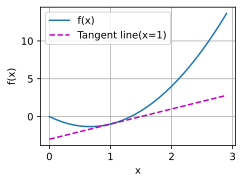

In [ ]:
# 在深度学习中的很多环节都会用到微积分的部分知识，例如反向传播梯度的计算等等，因此可以利用一些python包帮助理解微积分中的一些概念，导数和微分就是微积分中最基础的概念

import numpy as np 
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt

def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h
# 定义一个简单的函数，另外，通过导数的定义设计numerical_lim函数，通过迭代缩小变化值计算更为精确的导数值

h = 0.1
for i in range(5):
    print(" (h = %.5f, numerical limit = %.5f" % (h,numerical_lim(f,1,h)))
    h *= 0.1

# 这里在d2l原书中说明了复合函数的求导方式，都是一些高中就学过的知识，不再赘述，在这里介绍一下后续也会重复使用d2l包中的画图函数，因为复用性强且考虑到了一些复杂的作图考量

def use_display():
    backend_inline.set_matplotlib_formats("svg")
# backend_inline是IPython库的一个模块，主要作用是控制matplotlib图表的显示方式，设置的"svg"是一种矢量图格式，svg是一种基于XML的矢量图形格式，与"png"等位图格式不同，矢量图形格式可以做到无损缩放，但渲染复杂图形时消耗资源更多


def set_figsize(figsize = [3.5,2.5]):
    use_display()
    plt.rcParams["figure.figsize"] = figsize


def set_axes(axes,xlabel,ylabel,xscale,yscale,xlim,ylim,legend=None):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.grid()
    if legend:
        axes.legend(legend)

# 上述的所有格式设置都是为了下面的plot函数服务，plot函数考虑了这样几种情况：只有y轴方向的数据，这意味着x轴坐标可能不重要，默认赋值为[0,n-1];在相同的x轴取值下，同时画出多条函数曲线

def plot(X, Y=None, xlabel=None, ylabel=None, xscale='linear', yscale='linear', xlim=None, ylim=None, fmts=('-','m--','g-.','r:'), figsize=(3.5,2.5), axes=None, legend=None):
    # fmts中指定了四种绘图格式，默认的plot曲线颜色为蓝色，'-'也是默认格式，表示实线，‘--’表示虚线，‘-.’表示点划线，':'表示点线
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else plt.gca() # 未指定特定的绘图axes就选择当前的axes

    def has_oneaxis(x):
        if hasattr(x,"ndim") and x.ndim == 1 or isinstance(x,list) and not hasattr(x[0],"__len__"):
            return True
    # 这里的函数判断了两类情况，首先如果不是普通的list，那指定ndim==1确定了只会是一维的计算单元；如果是list类型，则x[0]没有'__len__'使得也不会出现二维以上的多维情况

    if has_oneaxis(X):
        X = [X] # 不管在调用plot函数时有没有指定y，这样的操作都会在原来的x基础上再套一个[],使得原来一维的计算单元变成了[1,n]这样的结构，这样的主要原因是为了配合后面的多组同时绘制

    if Y is None:
        X, Y = [[]] * len(X), X # 主要是为了处理未指定Y的情况,首先会执行将X的值赋给Y，再将X设置为对应长度的[]，这里设置对应长度主要是为了配合zip的解包
    elif has_oneaxis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()

    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            plt.plot(x,y,fmt)
        else:
            plt.plot(y,fmt)
    
    set_axes(axes,xlabel,ylabel,xscale,yscale,xlim,ylim,legend)

# 有了上面这样一个基础的画图函数，就可以表示导数切线和原始函数的关系了：
x = np.arange(0,3.0,0.1)
plot(x,[f(x),2*x-3],'x','f(x)',legend = ['f(x)','Tangent line(x=1)'])


# 偏导数、梯度和链式法则的部分没有示例代码，但内容比较简单，需要读者去了解的就是矩阵和向量求导的部分，这里可以参照matrix codebook这些较为基础的数学原理参考书

    


### 2.5 自动微分

In [64]:
# 自动求导是算法的关键步骤，pytorch等深度学习框架可以自动计算导数，通过自动微分的方式快速求导，无需每个人重复实现求导的部分，因此需要了解计算图和反向传播梯度等有关自动微分的内容

import torch

x = torch.arange(4.0)
print(x)

x.requires_grad_(True) # 等价于在tensor定义时:x = torch.tensor(4.0, requires_grad=True)
print(x.grad) # 初始赋值的时候默认为None

y = 2 * torch.dot(x,x)
y.backward()
print(x.grad) # 通过backward()函数反向传播，在x中得到此次传播中的梯度[0,4,8,12]

# 两倍的点乘在数值计算中梯度等于4 * x,因此可以在这里验证一下反向传播自动微分求导的正确性
print(x.grad == 4 * x)

# 通常在使用过程中，每次都需要清除当前的梯度值，因为pytorch默认累积梯度
x.grad.zero_()
y = x.sum()
y.backward()
print(x.grad) # 清除成功，输出[1,1,1,1]的梯度值

# 这里关于backward()的内容多介绍一点，backward中最常使用的一个参数就是gradient,gradient默认为1，比如前面的内容直接调用y.backward()就是这样的情况
# 要注意除了默认情况，还有对gradient赋予一个向量tensor的情况，我们首先来分析为什么可以这样调用,首先在上面的两个例子里，最后backward()的都是一个标量，如果不是这样的情况就会发生错误，但这里可能有些人会好奇，矩阵求导中诚然有标量对向量求导的结果，但明明可以有向量对向量求导的计算方式，那这在pytorch中如何表示呢，这就是gradient存在的原因：
# 如果在gradient指定了一个向量，则会在单独输出每个对应参数的梯度时，乘上对应的元素，假设此时的因变量也是一个向量，则不会输出一个矩阵的梯度，而是会累积输入向量对应的梯度，因为单次反向传播只关心输入向量中的每个元素变化了多少，pytorch中就按照这样的逻辑进行计算
# 常用的参数还有retain_graph, create_graph, inputs,读者可以自行查找上述参数的作用

# 在上面的介绍基础上，就可以引入非标量变量的反向传播计算
print(x)
x.grad.zero_()
y = x * x
y.sum().backward() # pytorch还是默认只会出现标量回传梯度的现象，因此上述的分析也可以理解成是对所有输入元素的梯度只和
print(x.grad)

# 前面介绍过clone()、copy_()、detach()等概念，因此可以理解这里列举分离计算的思路，即通过detach对tensor进行赋值，但实际上这个tensor已脱离计算图，不再参与梯度计算
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
print(x.grad == u) # 输出True,原因就是u已经脱离计算图的范畴不会计算u里面的x的梯度，因此把u看成是一个常数向量

# 还有一部分需要说明的是pytorch这个深度学习框架的一个特点，即计算图可以通过复杂的控制流仍然可以计算得到想要的输入变量的梯度，用下面的例子说明：
def f(a):
    '''这个函数包含比较复杂的循环、条件，本身如果作为一个运算步骤又是一个函数调用'''
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
# 即使是上面的函数，pytorch的自动微分计算仍然可以提取到输入元素的梯度
print(a.grad == d/a)

tensor([0., 1., 2., 3.])
None
tensor([ 0.,  4.,  8., 12.])
tensor([True, True, True, True])
tensor([1., 1., 1., 1.])
tensor([0., 1., 2., 3.], requires_grad=True)
tensor([0., 2., 4., 6.])
tensor([True, True, True, True])
tensor(True)


### 2.6 概率

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])
tensor([0., 0., 0., 0., 0., 1.])
tensor([1., 0., 1., 3., 3., 2.])
tensor([[3., 1., 3., 2., 0., 1.],
        [2., 0., 3., 1., 2., 2.]])
tensor([0.2000, 0.0000, 0.2000, 0.0000, 0.3000, 0.3000])


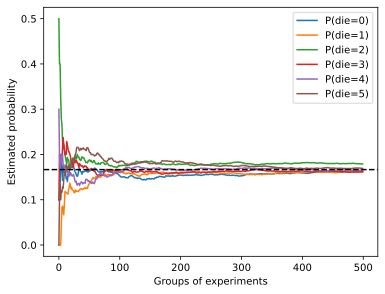

In [ ]:
# 深度学习本身有很多的工作就是基于概率论和统计学的一些知识来展开的，因此概率相关的一些知识也是深度学习的基础之一

# d2l在这一小章节正式开始之前很多的例子其实只是为了说明一件事：概率能帮助我们衡量一个特定任务中我们对几类互斥情况的确定程度，这样的思路使得概率能有效地应用于广泛的领域中

# 第一部分用一些python模块的组合解释了大数定理下统计频率回归于概率的结论
import torch
from torch.distributions import multinomial

fair_probs = torch.ones(6) / 6
print(fair_probs) # 通过fair_probs定义六种情况的离散均匀分布

print(multinomial.Multinomial(1, fair_probs).sample()) # 注意这个子模块的函数使用方式，这里等于每次采样1次，共实验1次
print(multinomial.Multinomial(10, fair_probs).sample()) # 一次实验，单次试验中采样10次
print(multinomial.Multinomial(10, fair_probs).sample((2,))) # 注意这里的多次实验的函数调用方式

# 归一化即可计算在统计学中的频率定义
print(multinomial.Multinomial(10, fair_probs).sample() / 10) # 有了这里的例子，读者可以想象通过重复实验模拟大数定理的情况

counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(axis=0) # 这里写axis和dim都可以
sum_row = cum_counts.sum(dim=1,keepdim=True)
estimates = cum_counts / sum_row
# 通过广播机制计算出了每次实验后的统计频率，我们可以在画图中看出大树下逐渐像概率靠近

plt.rcParams["figure.figsize"] = [6,4.5] # figsize很好玩的一个点是先指定x轴，因此跟矩阵维度顺序不一样
for i in range(6):
    plt.plot(estimates[:,i].numpy(),label=("P(die={})".format(i))) # 如果对python语法不熟悉可以了解一下字符串的写法，另外torch.tensor类变量无法直接在pyplot中画图
plt.axhline(y=0.1666,color="black",linestyle="dashed") # axhline绘制水平线，axvline绘制垂直线
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel("Estimated probability")
plt.legend()

# 剩下关于概率的内容没有示例代码，我们用文字的方式帮助理解这部分的内容，详见下一个markdown窗口

* 概率论中最基础的一个概念就是随机变量，随机变量在概率论的相关书籍中有明确的定义，可以帮助我们建模很多自然界中发生的事情，以自然图像为例，我们完全可以将单张图像的数万个像素建模为数万个对应的随机变量，多个随机变量的概率研究更为复杂，因此引入更多的概念
* 首当其冲的是联合概率，即多个随机变量的取值同时被满足的情况，联合概率分布最大的特征就是多个随机变量的取值同时满足的概率不大于其中真子集的随机变量被满足的概率
* 条件概率指的是当某一些随机变量满足条件的情况下，另一些随机变量的取值为x的概率，换言之，条件概率是有前提的概率
* 运用条件概率和联合概率的转换关系，统计学中一个重要的结论：Bayes定理呼之欲出。P(A,B)= P(B|A)P(A) = P(A|B)P(B)因此我们可以通过其中一个已知的条件概率求解另一个反过来的条件概率，即：
    $$
    P(A|B) = \frac{P(B|A)P(A)}{P(B)}
    $$
    上式的分子部分实际上就是联合分布
* 如果一个联合分布中包含多个随机变量，可以通过联合分布得到单个随机变量的分布，我们用下面的公式举例：
    $$
    P(B) = \sum_A P(A,B)
    $$
    上述公式表示的就是AB两个随机变量的联合概率，如果对A所有存在的可能性进行遍历，对整体的联合概率求和，就能得到单个随机变量某种可能性的概率，这个过程称为**边际化**，边际化的结果称为**边际概率**
* 概率和统计学中还有一个很关键的概念是依赖和独立，在两种情况下都能引申出相应的概率计算公式，简单的说，如果有两个随机变量满足：
    $$ 
    P(A, B) = P(A) * P(B)
    $$
    则可以说两个随机变量是独立的，另外可以从独立分布引申出条件独立，大致就是在条件概率的基础上施加独立的情况，即：
    $$
    P(A,B|C) = P(A|C) * P(B|C)
    $$
* d2l书后面有一个对概率相关基础性质的实战应用占了很大的篇幅，这里我们简单的通过文字内容进行说明：   
    ![HIV测试](./images/chapter2/1.png)    
    简单的说明一下这个示例，H表示艾滋病感染状态，阳性为1阴性为0，$D_1$表示诊断结果，阳性为1阴性为0，针对这类疾病诊断二分类问题，很多人就会关心假阳率等等一系列的疾病概念，这里我们不做展开。
    要注意这个表格中展示的是条件概率，因此无法直接计算一些边缘概率，我们给出一个分析问题的前提，即**人口总体是非常健康的，患病的概率只有0.15%**，$P(H=1)=0.0015$,通过边际概率的计算公式可以得到检验为阳的概率为0.011485，顺着这个思路，我们可以通过贝叶斯公式计算得到**在检验为阳的情况下，真实患病的概率只有0.1306**，这个概率貌似非常不符合我们的直觉，原因就是检验应该是相当准的，但是检验为阳真实为阳的概率只有一成，但实际上这个现象是正确的，原因就在于本身得病的概率太低了，在检验为阳的概率很低的情况下，本身得病的概率还是太低，导致整体的条件概率呈现出一个非常反常理的现象，因此这里的例子又用第二次检测来举例，即然一次为阳不太足以说明真实患病情况，那么就来两次，但难受的是第二次检验还没有第一次标准：    
    ![HIV测试2](./images/chapter2/2.png)   
    这时分析这个问题的随机变量增加至三个，条件概率中的限制条件也增加到两个，再次计算这个贝叶斯公式中的条件概率，就会得到如果在两次测量都为阳的情况下，就可以以83.07%的概率说明真的得病了，这就符合预期了，实际上，这也正是测定出现问题在二次叠加后能以更准确的概率符合真实疾病分布的结果。
* 还有一个很重要的就是方差和期望，这两个很简单，不多赘述。

### 2.7 查阅文档

In [ ]:
# 这里其实只有非常简单的几个概念。介绍的就是在一些不熟悉的函数和类出现时，如果了解他们的功能和使用方法

import torch

print(dir(torch.distributions))
# 简单来说，dir函数可以查询模块中有哪些函数和类

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'InverseGamma', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'Transform

In [ ]:
# 你忘了一些函数和类在哪里你当然可以用dir函数，但更多的时候我们是看到了一个新的函数或类，我们不知道怎么去使用

help(torch.ones)
# 介绍的内容中包含了函数功能的简单说明、各个参数的细节，甚至还有具体的使用方法示例，

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, us

In [87]:
# 在jupyter中，也有一种等同于help函数的写法，就是“？” 

torch.ones?
# 显示简要的帮助信息

Docstring:
ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `1`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword arguments:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_device`). :attr:`device` wil

In [90]:
torch.ones??
# 显示更为完整的帮助信息，作为jupyter的专属用法，加上print()之类的外壳反而会出错

Docstring:
ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `1`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword arguments:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_device`). :attr:`device` wil